## Name : Dharnidhar Deshmukh
## Refral code : IIPRSS5306

# Assignment: **Loan Prediction**

LightStream is an American online lender that is a division of Truist Bank. Truist was formed in
December 2019, as the result of a “merger of equals” between SunTrust Bank (of which LightStream was
a division) and BB&T. 

Debuting in March 2013, LightStream is a financial services technology company that provides
unsecured, personal loans to people with good credit ratings, through a digital process. 

The company needs a developed model that will help the agents visit the right customer by looking at
the prediction that the model would make depending on the given data fields. 

## **Problem Statement:**
To predict Loan Approval (1 or 0) based on the applicant's details. 

1) Does Employed or non-employed can be a crucial feature to allow the candidate to provide
loans. 

2) What is feature importance of whether person is employed to predict loan approval. 

3) Does bank balance matter for the company as a constraint for extending loans? 

4) Could you advice if the company needs to offer separate loans on the basis on the salary level of the employees?

5) Does bank balance have any influence on the loan approval rate? 

In addition to the above analysis, build a machine learning model to predict the loan approval to the atmost accuracy. Validate the hyper-parametrically tune the model to get the best results



## Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import OrderedDict
import scipy.stats as sci
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/Default_Fin.csv')

In [ ]:
df.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [ ]:
df = df.drop('Index', axis = 1)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [ ]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [ ]:
df.insert(3, 'Saving Rate', df['Bank Balance'] / df['Annual Salary'])
df.head()

,Employed,Bank Balance,Annual Salary,Saving Rate,Defaulted?
0,1,8754.36,532339.56,0.016445,0
1,0,9806.16,145273.56,0.067501,0
2,1,12882.60,381205.68,0.033794,0
3,1,6351.00,428453.88,0.014823,0
4,1,9427.92,461562.00,0.020426,0


Here with Bank Balance and Annual Salary, we create a new feature called Saving Rate.

This indicator shows some comsumption habbit about each user. Intuitively, a user with a higher saving rate is less likely to default. We will further explore their relationships later.

In [ ]:
df['Defaulted?'] = df['Defaulted?'].replace(0,'Not Defaulted')
df['Defaulted?'] = df['Defaulted?'].replace(1,'Defaulted')
df['Employed'] = df['Employed'].replace(0,'Not Employed')
df['Employed'] = df['Employed'].replace(1,'Employed')

In [ ]:
df.head()

,Employed,Bank Balance,Annual Salary,Saving Rate,Defaulted?
0,Employed,8754.36,532339.56,0.016445,Not Defaulted
1,Not Employed,9806.16,145273.56,0.067501,Not Defaulted
2,Employed,12882.60,381205.68,0.033794,Not Defaulted
3,Employed,6351.00,428453.88,0.014823,Not Defaulted
4,Employed,9427.92,461562.00,0.020426,Not Defaulted


In [ ]:
A = df['Defaulted?'].value_counts()
A

Not Defaulted    9667
Defaulted         333
Name: Defaulted?, dtype: int64

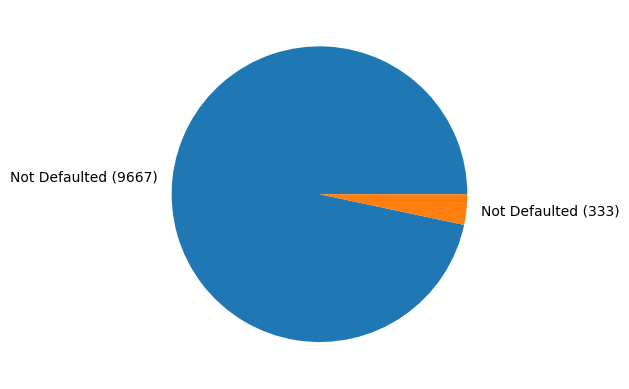

Not Defaulted    9667
Defaulted         333
Name: Defaulted?, dtype: int64

In [ ]:
plt.pie(df['Defaulted?'].value_counts(), labels = ['Not Defaulted (9667)', 'Not Defaulted (333)'], )
plt.show()
df['Defaulted?'].value_counts()

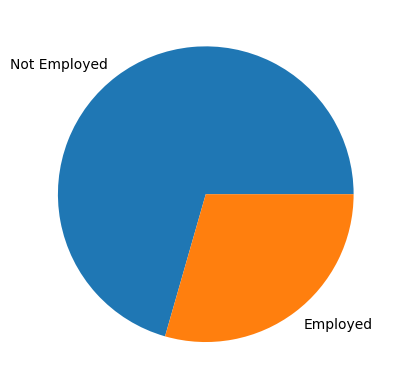

Employed        7056
Not Employed    2944
Name: Employed, dtype: int64

In [ ]:
plt.pie(df['Employed'].value_counts(), labels = ['Not Employed', 'Employed'], )
plt.show()
df['Employed'].value_counts()

In [ ]:
table =df[['Defaulted?', 'Employed']]
fig = px.sunburst(table, 
                  path=['Employed','Defaulted?'],
                  title='Default related with employment')
fig.show()

In [ ]:
table = pd.crosstab(df['Employed'],df['Defaulted?'])
table

Defaulted?,Defaulted,Not Defaulted
Employed,,
Employed,206,6850
Not Employed,127,2817


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)
p

0.0004997256756210478

### Conclusion

The p-value is approximately 0.0005 << 0.05, we conclude that they are not independent.

Therefore, Employed status can be used to predict default.

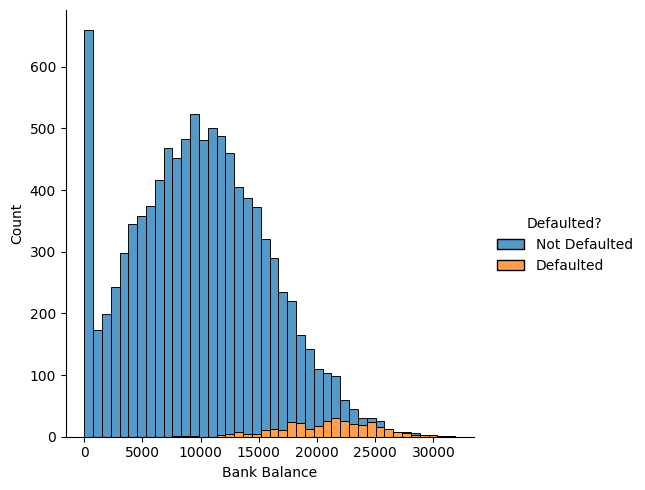

In [ ]:
sns.displot(df, x="Bank Balance", hue="Defaulted?", multiple="stack")

We find that this is an asymmetric distribution, with many people having zero bank balance.

Let's further check this by calculating number of accounts with less than 10 dollars.

In [ ]:
(df['Bank Balance'] <= 10).sum()

501

About 500 people have barely not saving in the bank account, which may be a risky factor for loan default.

Those who are Defaulted tend to have a higher Bank Balance.

This seemingly counterintuitive observation shows a potential risk of confounding factors.

Maybe high Bank Balance group could get loan more easily, which results in more default numbers.

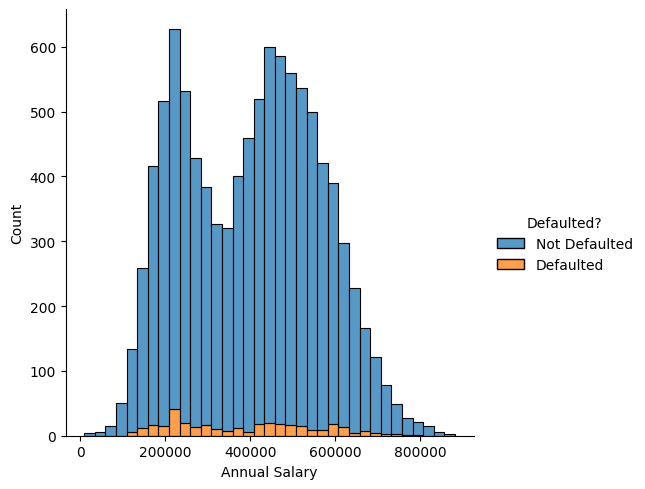

In [ ]:
sns.displot(df, x="Annual Salary", hue="Defaulted?", multiple="stack")

Default cases happened almost everywhere withing all groups of Annual Salary range. This tells us that Annual Salary may not be very predictive regarding to Defualted.

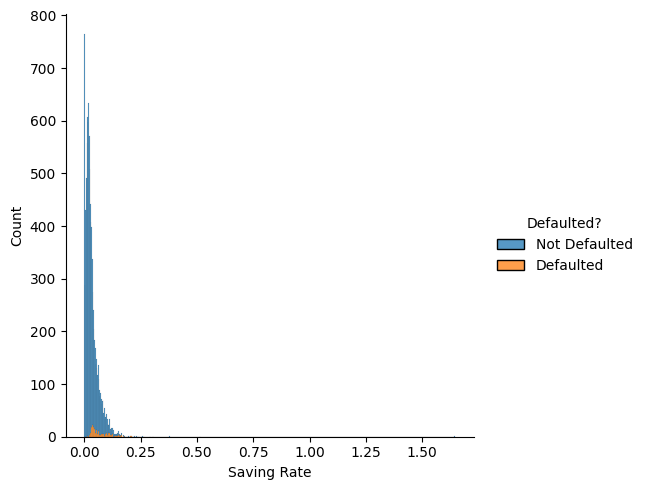

In [ ]:
sns.displot(df, x="Saving Rate", hue="Defaulted?", multiple="stack")

Saving Rate has a distribution similar to Bank balance, but with some extreme outliners.

This shows that people's saving habit varies a lot!

There are people eanring a lot and spend even more! And there are also people who has a lot of saving with a relatively low salary.

## Model Building

In [ ]:
df['Defaulted?'] = df['Defaulted?'].replace('Not Defaulted',0)
df['Defaulted?'] = df['Defaulted?'].replace('Defaulted',1)
df['Employed'] = df['Employed'].replace('Not Employed',0)
df['Employed'] = df['Employed'].replace('Employed',1)

In [ ]:
x = df.drop(['Defaulted?'], axis = 1)
y = df['Defaulted?']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 40 )

In [ ]:
def model_builder(estimator, metric, X, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 1 )
  model = estimator()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  result= accuracy_score(y_test, y_pred)
  CMV = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
  plt.show() 
  return result, CMV

In [ ]:
lr = LogisticRegression()

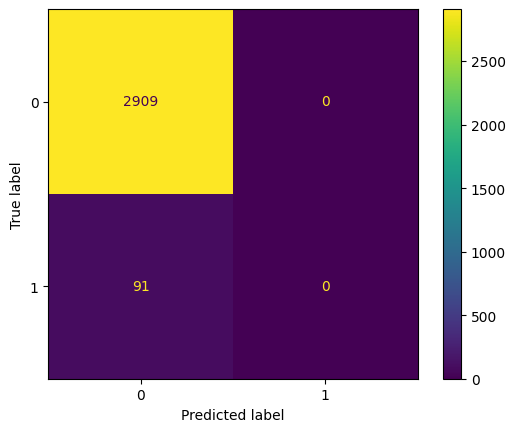

(0.9696666666666667,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f08d9f27be0>)

In [ ]:
model_builder(LogisticRegression, accuracy_score,x,y)

Hyperparameter Tunning

In [ ]:
distributions = dict(C=np.linspace(2, 1000, 100),
                     penalty=['l2', 'l1'])

clf = RandomizedSearchCV(LogisticRegression(random_state=41), 
                         distributions,
                         scoring='recall', 
                         n_iter=100,
                         n_jobs = -1,
                         random_state=41)
clf_logistic = clf.fit(x_train, y_train)
clf_logistic.best_params_

{'penalty': 'l2', 'C': 485.8787878787879}

[[2892    0]
 [ 108    0]]
0.964


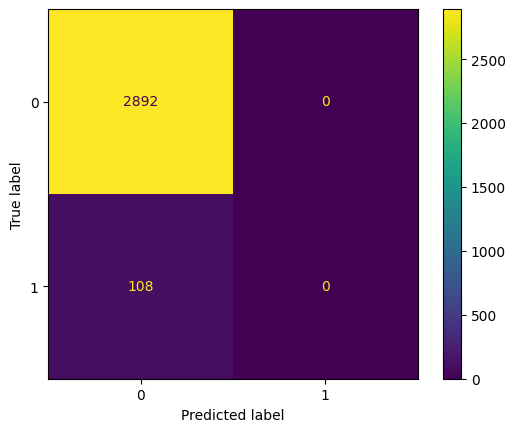

In [ ]:
y_pred_logistic = clf_logistic.predict(x_test)
print(confusion_matrix(y_test,y_pred_logistic))
print(accuracy_score(y_test, y_pred_logistic))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logistic)
plt.show() 

In this case hyperparameter tunning not helped much.

In [ ]:
def correlation_with_tagret(data, t_col):
    independent_variable = data.drop(t_col, axis =1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index= ['Independent Variables', 'correlation']).T
    return result.sort_values('correlation', ascending = False)

In [ ]:
correlation_with_tagret(df, 'Defaulted?')

,Independent Variables,correlation
1,Bank Balance,0.350119
3,Saving Rate,0.198553
2,Annual Salary,-0.019871
0,Employed,-0.03542


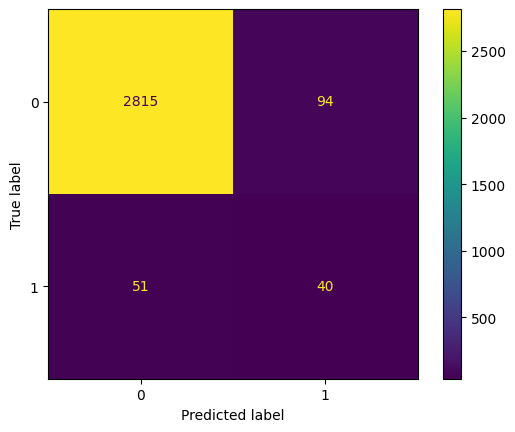

(0.9516666666666667,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f08d9f25600>)

In [ ]:
# Trying with Decision Tree
model_builder(DecisionTreeClassifier, accuracy_score,x,y)

In [ ]:
def dt_feature_importance(model,normalize=True):

    left_c = model.tree_.children_left
    right_c = model.tree_.children_right

    impurity = model.tree_.impurity    
    node_samples = model.tree_.weighted_n_node_samples 

    # Initialize the feature importance, those not used remain zero
    feature_importance = np.zeros((model.tree_.n_features,))

    for idx,node in enumerate(model.tree_.feature):
        if node >= 0:
            # Accumulate the feature importance over all the nodes where it's used
            feature_importance[node]+=impurity[idx]*node_samples[idx]- \
                                   impurity[left_c[idx]]*node_samples[left_c[idx]]-\
                                   impurity[right_c[idx]]*node_samples[right_c[idx]]

    # Number of samples at the root node
    feature_importance/=node_samples[0]

    if normalize:
        normalizer = feature_importance.sum()
        if normalizer > 0:
            feature_importance/=normalizer

    return feature_importance

In [ ]:
df.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Saving Rate',
       'Defaulted?'],
      dtype='object')

In [ ]:
dt_feature_importance(dt)

array([0.20568612, 0.01708667, 0.54629925, 0.10966458, 0.12126338])

# ***Conclusion***
1) Employed or Non Employed is the important feature to predict Defalted or not. but Annual salary is most important feature.

2) Salary Level is not very predictive regarding Defalted. so company should not offer loans basis on salary level.

We Build a model to predict default or not. with the help of this model company can decide whether loan to be grant or not. 

Our model have 96 % accuracy.